# Bài tập về nhà 3
# Convolutional Neural Network

### Tóm tắt nội dung
Trong bài tập này, các bạn sẽ sử dụng kiến thức đã học về convolutional neural networks để giải quyết bài toán phân lớp (classification).

## Mục lục
* [1. Hướng Dẫn](#C1)
    * [1.1. Cấu trúc file](#C1_1)
* [2. Sử dụng util.py ](#C2)
    * [2.1. Hàm load_npy()](#C2_1)
    * [2.2. Hàm load_list()](#C2_2)
    * [2.3. Hàm save_list()](#C2_3)
    * [2.4. Hàm read_mnist_gz()](#C2_4)
    * [2.5. Hàm get_mnist_data()](#C2_5)
    * [2.6. Hàm get_bat_data()](#C2_6)
    * [2.7. Hàm normalize()](#C2_7)
    * [2.8. Hàm create_one_hot()](#C2_8)
* [3. Hiện thực convolution neural network với fashion mnist data](#C3)
    * [3.1. Class mnist_classification](#C3_1)
    * [3.2. Chọn tham số](#C3_2)
    * [3.3. Huấn luyện mô hình](#C3_3)
    * [3.4. Kết luận](#C3_4)
* [4. Hiện thực neural network với bat data](#C4)
    * [4.1. Class bat_classification](#C4_1)
    * [4.2. Chọn tham số](#C4_2)
    * [4.3. Huấn luyện mô hình](#C4_3)
    * [4.4. Kết luận](#C4_4)

## 1. Hướng dẫn <a id='C1'></a>
Chương này sẽ hướng dẫn những điều cần thiết để hoàn thành bài tập này.


Bài tập này sẽ gồm có hai bài chính:
- Bài 1: phân loại tập fashion MNIST dùng convolutional neural networks.
- Bài 2: phân loại tập bat data dùng neural networks.

Yêu cầu dành cho các bạn trong là giải quyết hai bài trên bằng **Keras và TensorFlow**.

### 1.1. Cấu trúc file <a id='C1_1'></a>
Bài tập lớn này được đi kèm với các file sau: 
- util.py: cung cấp các hàm để đọc dữ liệu trong thưc mục data thành các
ma trận numpy. Bạn không cần chỉnh sửa file này.
- cnn_tf.py: sử dụng Tensorflow và Keras để giải quyết bài 1 và 2.
- bat.dat: dữ liệu của bài 1.
- /fashion-mnist/*.gz: dữ liệu của bài 2.

## 2. Sử dụng util.py <a id='C2'></a>

Chương này mô tả các feature trong file util.py.

Sử dụng các thư viện sau:

In [1]:
"""
This files helps you read data from data files
"""
import pickle
import gzip
import glob
import numpy as np
import sys

import matplotlib.pyplot as plt
import pdb

### 2.1. Hàm load_npy() <a id='C2_1'></a>

Mục đích: Sử dụng để load numpy data file
- Input: file_name
- Output: obj

In [2]:
def load_npy(file_name):
    """load_npy
    Load numpy data file. This is needed as python 2.7 pickle uses ascii as default encoding method but python 3.x uses utf-8.abs

    :param file_name: npy file path
    
    :return obj: loaded numpy object
    """
    
    if (sys.version_info[0] >= 3):
        obj = np.load(file_name, encoding='latin1')
    elif (sys.version_info[0] >=2):
        obj = np.load(file_name)
    
    return obj

### 2.2. Hàm load_list() <a id='C2_2'></a>

Mục đích: Sử dụng để load 1 list object vào file_name
- Input: file_name
- Output: list_obj

In [3]:
def load_list(file_name):
    """load_list
    Load a list object to file_name.

    :param file_name: string, file name.
    """
    end_of_file = False
    list_obj = [] 
    f = open(file_name, 'rb')
    python_version = sys.version_info[0]
    while (not end_of_file):
        try:
            if (python_version >= 3):
                list_obj.append(pickle.load(f, encoding='latin1'))
            elif (python_version >=2):
                list_obj.append(pickle.load(f))
        except EOFError:
            end_of_file = True
            print("EOF Reached")

    f.close()
    return list_obj 

### 2.3. Hàm save_list() <a id='C2_3'></a>

Mục đích: Sử dụng để save 1 list object vào trong file_name
- Input: list_obj, file_name
- Output: Save data

In [4]:
def save_list(list_obj, file_name):
    """save_list
    Save a list object to file_name
    
    :param list_obj: List of objects to be saved.
    :param file_name: file name.
    """

    f = open(file_name, 'wb')
    for obj in list_obj:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
    f.close() 

### 2.4. Hàm read_mnist_gz() <a id='C2_5'></a>

Mục đích: Dùng để đọc fashion MNIST data dưới dạng nén
- Input: data_path, offset
- Output: dataset

In [5]:
def read_mnist_gz(data_path, offset):
    with gzip.open(data_path, 'rb') as f:
        dataset = np.frombuffer(f.read(), dtype=np.uint8, offset=offset)

    return dataset

### 2.5. Hàm get_mnist_data() <a id='C2_6'></a>

Mục đích: Dùng để load fashion MNIST data
- Input: sampling_step
- Output: List của data

In [6]:
def get_mnist_data(sampling_step=20):
    print('Reading fashion MNIST data...')
    train_x = read_mnist_gz('./data/fashion-mnist/train-images-idx3-ubyte.gz', 16)
    train_y = read_mnist_gz('./data/fashion-mnist/train-labels-idx1-ubyte.gz', 8)
    test_x = read_mnist_gz('./data/fashion-mnist/t10k-images-idx3-ubyte.gz', 16)
    test_y = read_mnist_gz('./data/fashion-mnist/t10k-labels-idx1-ubyte.gz', 8)
    num_train = len(train_y)
    num_test = len(test_y)

    train_x = train_x.reshape((num_train, 28*28))
    test_x = test_x.reshape((num_test, 28*28))

    val_x = train_x[50000:,:]
    val_y = train_y[50000:]
    train_x = train_x[:50000,:]
    train_y = train_y[:50000]

    train_x = train_x[0::sampling_step,:]
    train_y = train_y[0::sampling_step]
    val_x = val_x[0::sampling_step,:]
    val_y = val_y[0::sampling_step]
    test_x = test_x[0::sampling_step,:]
    test_y = test_y[0::sampling_step]
 
    print("Done reading")
    return train_x.astype(np.float32), train_y, val_x.astype(np.float32), val_y, test_x.astype(np.float32), test_y

### 2.6. Hàm get_bat_data() <a id='C2_7'></a>

Mục đích: Đọc liệu dơi
- Input: bat data
- Output: train_x, train_y, test_x, test_y

In [7]:
def get_bat_data():
    """
    Load bat data and return it as a list: [train_x, train_y, test_x, test_y]
    """
    print('Reading bat data...')
    train_x, train_y, test_x, test_y = load_list('./data/bat.dat')

    print('Done reading')
    return train_x, train_y, test_x, test_y

### 2.7. Hàm normalize() <a id='C2_10'></a>

Mục đích: Chuẩn hóa
- Input: train_x, val_x, test_x
- Output: train_x, val_x, test_x

In [8]:
def normalize(train_x, val_x, test_x):
    """normalize
    This function computes train mean and standard deviation on all pixels then applying data scaling on train_x, val_x and test_x using these computed values

    :param train_x: train samples, shape=(num_train, num_feature)
    :param val_x: validation samples, shape=(num_val, num_feature)
    :param test_x: test samples, shape=(num_test, num_feature)
    """
    # train_mean and train_std should have the shape of (1, 1)
    train_mean = np.mean(train_x, axis=(0,1), dtype=np.float64, keepdims=True)
    train_std = np.std(train_x, axis=(0,1), dtype=np.float64, keepdims=True)

    train_x = (train_x-train_mean)/train_std
    val_x = (val_x-train_mean)/train_std
    test_x = (test_x-train_mean)/train_std
    return train_x, val_x, test_x

## 3. Hiện thực convolution neural network với fashion mnist data <a id='C3'></a>

### 3.1. Class mnist_classification <a id='C3_1'></a>

In [9]:
import pandas as pd
from util import * 
import matplotlib.pyplot as plt


#Import Numpy for statistical calculations
import numpy as np

# Import Warnings 
import warnings
warnings.filterwarnings('ignore')

# Import matplotlib Library for data visualisation
import matplotlib.pyplot as plt

#Import train_test_split from scikit library
from sklearn.model_selection import train_test_split

# Import Keras
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
import tensorflow.compat.v1 as tf

In [12]:
def mnist_classification():
    # Load data from file
    # Make sure that fashion-mnist/*.gz is in data/
    x_train, y_train, x_validate, y_validate, x_test, y_test = get_mnist_data(1)

    x_train, x_validate, x_test = normalize(x_train, x_validate, x_test)    

    y_train = y_train.flatten().astype(np.int32)
    y_validate = y_validate.flatten().astype(np.int32)
    y_test = y_test.flatten().astype(np.int32)
    image_shape = (28,28,1)

    x_train = x_train.reshape(x_train.shape[0],*image_shape)
    x_test = x_test.reshape(x_test.shape[0],*image_shape)
    x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

    # CNN parameters
    learning_rate = 0.001
    epochs_x = 50
    batch_size = 512

    # Choose activation function
    activation = tf.nn.relu

    # Create optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

    cnn_model = Sequential([
                Conv2D(filters=32,kernel_size=3,activation=activation,input_shape = image_shape),
                MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
                Dropout(0.2),
                Flatten(), # flatten out the layers
                Dense(32,activation=activation),
                Dense(10,activation = 'softmax')
                ])
   
    # Specify that all features have real-value data
    cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=optimizer,metrics =['accuracy'])
    cnn_model.summary()

    tensorboard = TensorBoard(
            log_dir = r'logs\{}'.format('cnn_1layer'),
            write_graph = True,
            histogram_freq=1,
            write_images = True
            )
    
    history = cnn_model.fit(
                x_train,
                y_train,
                batch_size=batch_size,
                epochs=epochs_x,
                verbose=1,
                validation_data=(x_validate,y_validate),
                callbacks = [tensorboard]
                )
    
    score = cnn_model.evaluate(x_test,y_test,verbose=0)
    print('Test Loss : {:.4f}'.format(score[0]))
    print('Test Accuracy : {:.4f}'.format(score[1]))

    # Plot data
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
    plt.title('Training and Validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

### 3.2. Chọn tham số <a id='C3_2'></a>

- Ở đây chúng ta sẽ lựa chọn những tham số sau:
    - learning_rate = 0.001
    - epochs_x = 50
    - batch_size = 512
    - activation = tf.nn.relu
    - optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

### 3.3. Huấn luyện mô hình <a id='C3_3'></a>

Reading fashion MNIST data...
Done reading
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                173088    
                                                                 
 dense_3 (Dense)             (None, 10)                330       
           

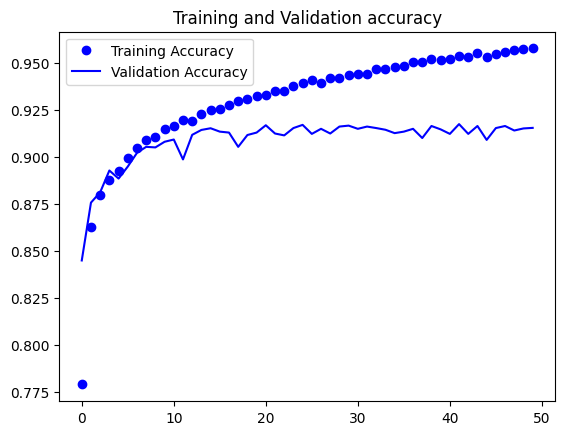

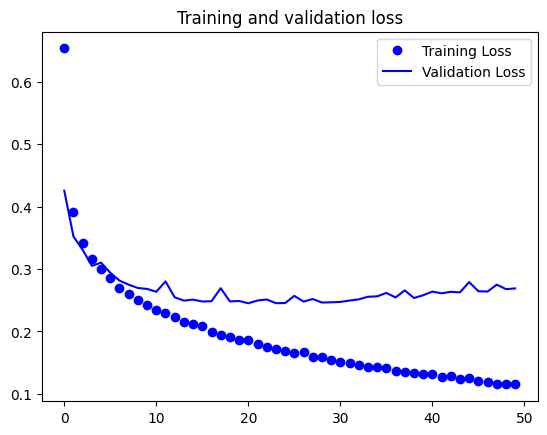

In [13]:
if __name__ == '__main__':
    np.random.seed(2017) 
    plt.ion()
    mnist_classification()

### 3.4. Kết luận <a id='C3_4'></a>



- CNN đem lại kết quả rất khả quan cho bài toán classification, tuy nhiên thời gian huấn luyện đồng thời cũng lâu hơn khá nhiều so với những giải thuật khác.
- Kết quả cho bài toán Fashion MNIST classification là:
    - Test Loss : 0.2862
    - Test Accuracy : 0.9117
- Nhận xét về tâp dữ liệu MNIST: Có vẻ như sự đa dạng của các mẫu tương tự hiện diện trên nhiều lớp ảnh hưởng đến hiệu suất của bộ phân loại mặc dù CNN là một kiến ​​trúc mạnh mẽ. Áo khoác, áo sơ mi và áo cánh dài tay có các mẫu tương tự nhau: tay áo dài (hoặc không), nút (hoặc không),...

## 4. Hiện thực convolution neural network với bat data<a id='C4'></a>

### 4.1. Class bat_classification <a id='C4_1'></a>



In [ ]:
def bat_classification():
    # Load data from file
    # Make sure that bat.dat is in data/
    x_train, y_train, x_test, y_test = get_bat_data()
    x_train, _, x_test = normalize(x_train, x_train, x_test)    

    y_test  = y_test.flatten().astype(np.int32)
    y_train = y_train.flatten().astype(np.int32)
    num_class = (np.unique(y_train)).shape[0]

    image_shape = (x_train.shape[0],1)

    x_train = x_train.reshape(x_train.shape[0],*image_shape)
    x_test = x_test.reshape(x_test.shape[0],*image_shape)
 
    # CNN parameters
    learning_rate = 0.01
    epochs_x = 100
    batch_size = 512

    # Choose activation function
    activation = tf.nn.relu

    # Create optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

    cnn_model = Sequential([
                Conv2D(filters=32,kernel_size=3,activation=activation,input_shape = image_shape),
                MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
                Dropout(0.2),
                Flatten(), # flatten out the layers
                Dense(32,activation=activation),
                Dense(10,activation = 'softmax')
                ])
   
    # Specify that all features have real-value data
    cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=optimizer,metrics =['accuracy'])
    cnn_model.summary()

    tensorboard = TensorBoard(
            log_dir = r'logs\{}'.format('cnn_1layer'),
            write_graph = True,
            histogram_freq=1,
            write_images = True
            )
    
    history = cnn_model.fit(
                x_train,
                y_train,
                batch_size=batch_size,
                epochs=epochs_x,
                verbose=1,
                validation_data=(x_train,x_train),
                callbacks = [tensorboard]
                )
    
    score = cnn_model.evaluate(x_test,y_test,verbose=0)
    print('Test Loss : {:.4f}'.format(score[0]))
    print('Test Accuracy : {:.4f}'.format(score[1]))

    # Plot data
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
    plt.title('Training and Validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

### 4.2. Chọn tham số <a id='C4_2'></a>



- Ở đây chúng ta sẽ lựa chọn những tham số sau:
    - learning_rate = 0.01
    - epochs_x = 100
    - batch_size = 512
    - activation = tf.nn.relu
    - optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

### 4.3. Huấn luyện mô hình <a id='C4_3'></a>



In [ ]:
if __name__ == '__main__':
    np.random.seed(2017) 

    plt.ion()
    bat_classification()

### 4.4. Kết luận <a id='C4_4'></a>



- Mô hình NN nói chung và CNN nói riêng vẫn rất hiệu quả trong bài toán phân lớp.
- Kết quả cho bài toán Bat classification là:
- Nhận xét về tâp dữ liệu Bat: Đơn giản hơn và training nhanh hơn